In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.cluster import contingency_matrix

In [219]:
# Configuration to automatically reload modified modules
%load_ext autoreload
%autoreload 2

# This allows changes in imported modules to be reflected automatically
# without needing to restart the kernel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Gold Standard Corpus

In [220]:
gold_corpus = pd.read_csv("../Task_3/data/corpus_raw.csv")

# Build ground-truth dictionary for BCubed
ldict = {i: {str(label)} for i, label in enumerate(gold_corpus["category"])}

In [221]:
N_COMPONENTS = 50

# Load Vector Space Model

In [222]:
import os
import sys


# Add the Task_3 directory to the Python path
sys.path.append(os.path.join(os.getcwd(), "../Task_3"))
from vectorizing import load_vectors_scipy

## TF (BoW) vectors

In [223]:
tf_vectors, tf_vocab = load_vectors_scipy("../Task_3/data/VSM/tf_vectors")
tfidf_vectors, tfidf_vocab = load_vectors_scipy("../Task_3/data/VSM/tfidf_vectors")

### K-Means clustering

In [224]:
from clustering import kmeans_pipeline

In [225]:
tf_cluster_labels = kmeans_pipeline(tf_vectors, n_components=N_COMPONENTS)

tf_cdict = {i: {str(label)} for i, label in enumerate(tf_cluster_labels)}

/Users/thedandy/Desktop/Master_IA_codigos/text-mining/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


#### Evaluation

##### Bcubed metric

In [226]:
from cluster_evaluation import bcubed_evaluation

In [227]:
precision, recall, fscore = bcubed_evaluation(ldict, tf_cdict)

print(f"BCubed Precision: {precision:.3f}")
print(f"BCubed Recall: {recall:.3f}")
print(f"BCubed F-score: {fscore:.3f}")

BCubed Precision: 0.223
BCubed Recall: 0.208
BCubed F-score: 0.216


##### ARI (Adjusted Rand Index)

In [228]:
from cluster_evaluation import ari_evaluation


print("ARI: ", ari_evaluation(gold_corpus["category"], tf_cluster_labels))

ARI:  0.038082229001103994


##### Confussion Matrix

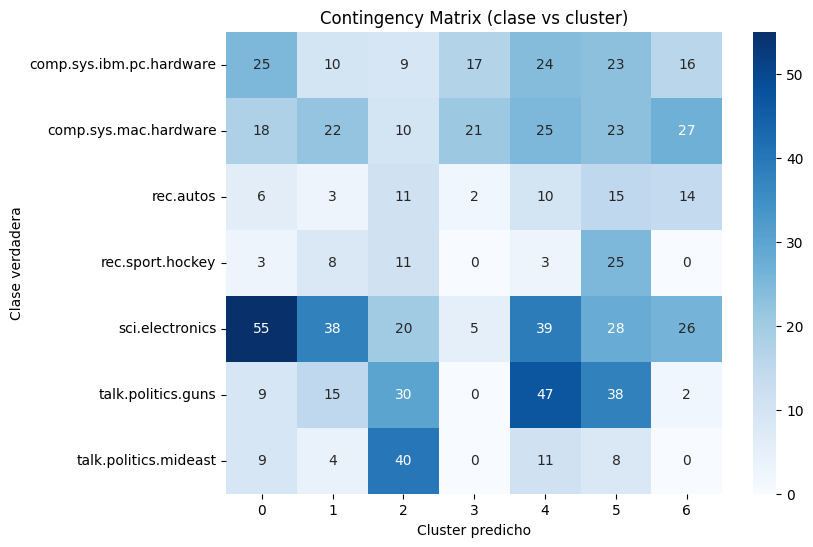

In [229]:
# y_true: real classes (strings)
# y_pred: cluster ids (integers)
y_true = gold_corpus["category"].values
C = contingency_matrix(y_true, tf_cluster_labels)

yticks = np.unique(y_true)
xticks = np.unique(tf_cluster_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(C, annot=True, fmt="d", cmap="Blues", yticklabels=yticks, xticklabels=xticks)
plt.xlabel("Cluster predicho")
plt.ylabel("Clase verdadera")
plt.title("Contingency Matrix (clase vs cluster)")
plt.show()

### --- clustering

## TF-IDF vectors

### K-Means clustering

In [230]:
tfidf_cluster_labels = kmeans_pipeline(tfidf_vectors, n_components=N_COMPONENTS)

tfidf_cdict = {i: {str(label)} for i, label in enumerate(tfidf_cluster_labels)}

/Users/thedandy/Desktop/Master_IA_codigos/text-mining/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


#### Evaluation

##### Bcubed metric

In [231]:
precision, recall, fscore = bcubed_evaluation(ldict, tfidf_cdict)

print(f"BCubed Precision: {precision:.3f}")
print(f"BCubed Recall: {recall:.3f}")
print(f"BCubed F-score: {fscore:.3f}")

BCubed Precision: 0.388
BCubed Recall: 0.416
BCubed F-score: 0.401


##### ARI (Adjusted Rand Index)

In [232]:
print("ARI: ", ari_evaluation(gold_corpus["category"], tfidf_cluster_labels))

ARI:  0.2014604509645642


##### Confussion Matrix

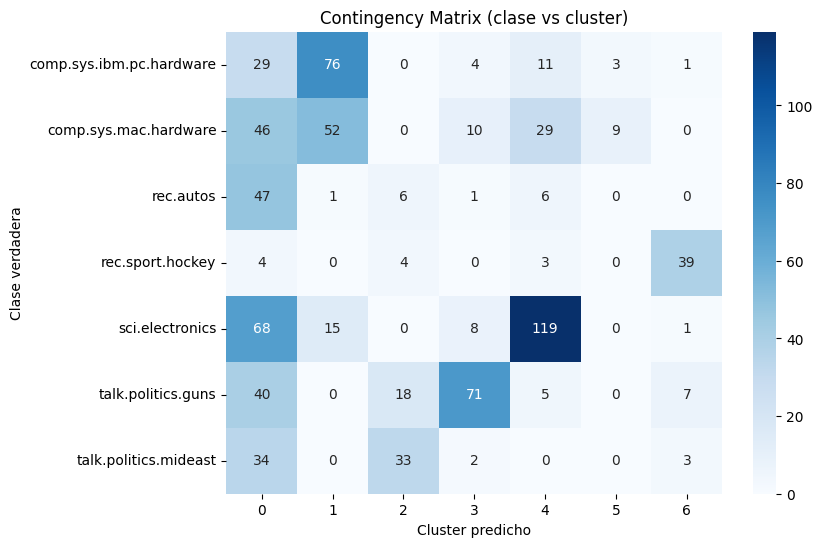

In [233]:
# y_true: real classes (strings)
# y_pred: cluster ids (integers)
y_true = gold_corpus["category"].values
C = contingency_matrix(y_true, tfidf_cluster_labels)

yticks = np.unique(y_true)
xticks = np.unique(tfidf_cluster_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(C, annot=True, fmt="d", cmap="Blues", yticklabels=yticks, xticklabels=xticks)
plt.xlabel("Cluster predicho")
plt.ylabel("Clase verdadera")
plt.title("Contingency Matrix (clase vs cluster)")
plt.show()

### --- clustering

# Semantic Space Model

In [234]:
from embedding import load_embeddings


additive_sentence_embeddings = load_embeddings(
    filepath="../Task_3/data/ESM/additive_sentence_embeddings.npz"
)
average_sentence_embeddings = load_embeddings(
    filepath="../Task_3/data/ESM/average_sentence_embeddings.npz"
)

## Additive Embeddings

### K-Means clustering

In [235]:
additive_se_cluster_labels = kmeans_pipeline(
    additive_sentence_embeddings, n_components=N_COMPONENTS
)

additive_se_cdict = {i: {str(label)} for i, label in enumerate(additive_se_cluster_labels)}

/Users/thedandy/Desktop/Master_IA_codigos/text-mining/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


#### Evaluation

##### Bcubed metric

In [236]:
precision, recall, fscore = bcubed_evaluation(ldict, additive_se_cdict)

print(f"BCubed Precision: {precision:.3f}")
print(f"BCubed Recall: {recall:.3f}")
print(f"BCubed F-score: {fscore:.3f}")

BCubed Precision: 0.272
BCubed Recall: 0.249
BCubed F-score: 0.260


##### ARI (Adjusted Rand Index)

In [237]:
print("ARI: ", ari_evaluation(gold_corpus["category"], additive_se_cluster_labels))

ARI:  0.11001116669139523


##### Confussion Matrix

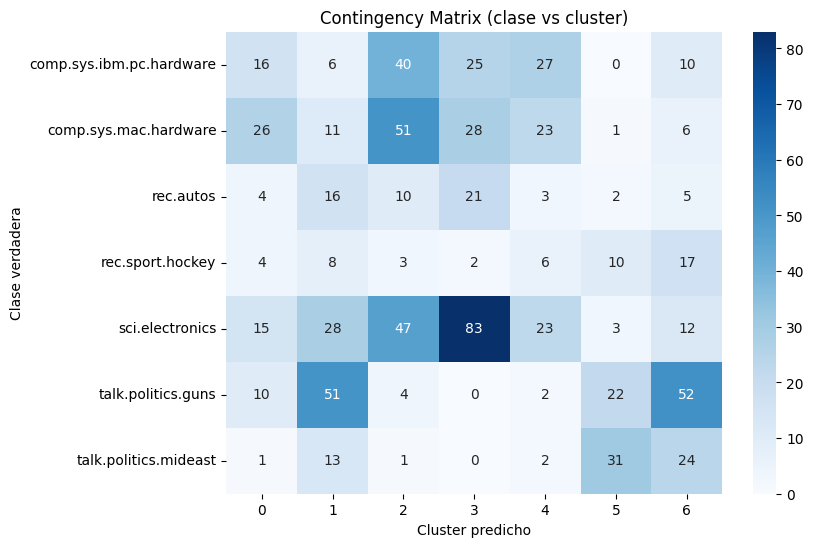

In [238]:
# y_true: real classes (strings)
# y_pred: cluster ids (integers)
y_true = gold_corpus["category"].values
C = contingency_matrix(y_true, additive_se_cluster_labels)

yticks = np.unique(y_true)
xticks = np.unique(additive_se_cluster_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(C, annot=True, fmt="d", cmap="Blues", yticklabels=yticks, xticklabels=xticks)
plt.xlabel("Cluster predicho")
plt.ylabel("Clase verdadera")
plt.title("Contingency Matrix (clase vs cluster)")
plt.show()

## Average Embeddings

### K-Means clustering

In [239]:
average_se_cluster_labels = kmeans_pipeline(average_sentence_embeddings, n_components=N_COMPONENTS)

average_se_cdict = {i: {str(label)} for i, label in enumerate(average_se_cluster_labels)}

/Users/thedandy/Desktop/Master_IA_codigos/text-mining/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


#### Evaluation

##### Bcubed metric

In [240]:
precision, recall, fscore = bcubed_evaluation(ldict, average_se_cdict)

print(f"BCubed Precision: {precision:.3f}")
print(f"BCubed Recall: {recall:.3f}")
print(f"BCubed F-score: {fscore:.3f}")

BCubed Precision: 0.273
BCubed Recall: 0.253
BCubed F-score: 0.263


##### ARI (Adjusted Rand Index)

In [241]:
print("ARI: ", ari_evaluation(gold_corpus["category"], average_se_cluster_labels))

ARI:  0.10574175330416793


##### Confussion Matrix

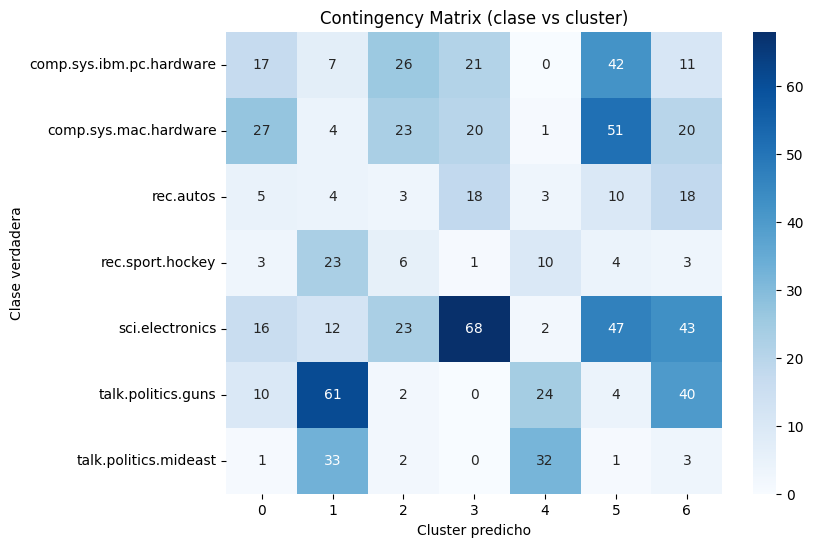

In [242]:
# y_true: real classes (strings)
# y_pred: cluster ids (integers)
y_true = gold_corpus["category"].values
C = contingency_matrix(y_true, average_se_cluster_labels)

yticks = np.unique(y_true)
xticks = np.unique(average_se_cluster_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(C, annot=True, fmt="d", cmap="Blues", yticklabels=yticks, xticklabels=xticks)
plt.xlabel("Cluster predicho")
plt.ylabel("Clase verdadera")
plt.title("Contingency Matrix (clase vs cluster)")
plt.show()